# K-means Clustering 

In this this project, we will implement the K-means algorithm and use it for image compression. 


# Outline
- [ 1 - Implementing K-means](#1)
  - [ 1.1 Finding closest centroids](#1.1)
  - [ 1.2 Computing centroid means](#1.2)
- [ 2 - K-means on a sample dataset ](#2)
- [ 3 - Random initialization](#3)
- [ 4 - Image compression with K-means](#4)
  - [ 4.1 Dataset](#4.1)
  - [ 4.2 K-Means on image pixels](#4.2)
  - [ 4.3 Compress the image](#4.3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

<a name="1.1"></a>
### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids.

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]


    idx = np.zeros(X.shape[0], dtype=int)


    for i in range(X.shape[0]):
          # Array to hold distance between X[i] and each centroids[j]
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)

    
    return idx

Now let's check your implementation using an example dataset

In [3]:
# Load an example dataset that we will be using
X = load_data()

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [4]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [5]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)


First three elements in idx are: [0 2 1]
All tests passed!


<a name="1.2"></a>
### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.

In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    
    centroids = np.zeros((K, n))
       
    for k in range(K):   
          points = points = X[idx == k]
          centroids[k] =  np.mean(points, axis = 0)
    
    return centroids

Now check your implementation by running the cell below

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


<a name="2"></a>
## 2 - K-means on a sample dataset 

After we have completed the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to run the
K-means algorithm on a toy 2D dataset to help you understand how
K-means works. 

When we run the code below, it will produce a
visualization that steps through the progress of the algorithm at
each iteration.

In [8]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


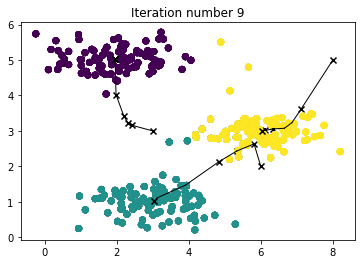

In [9]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Random initialization

The initial assignments of centroids for the example dataset was designed so that you will see the same figure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the
training set.

In [9]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<a name="4"></a>
## 4 - Image compression with K-means

In this section, we will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

### 4.1 Dataset

**Load image**

First, we will use `matplotlib` to read in the original image, as shown below.

In [10]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

**Visualize image**

We can visualize the image that was just loaded using the code below.

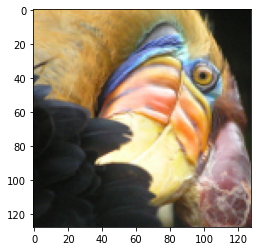

In [11]:
# Visualizing the image
plt.imshow(original_img)

In [12]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


#### Processing data

To call the `run_kMeans`, we need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [13]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, we run the cell below to run K-Means on the pre-processed image.

In [14]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [15]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [6 6 6 6 6]


<a name="4.3"></a>
### 4.3 Compress the image


After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 

In [16]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, we can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 

<img src="images/figure 3.png" width="700" height="700">


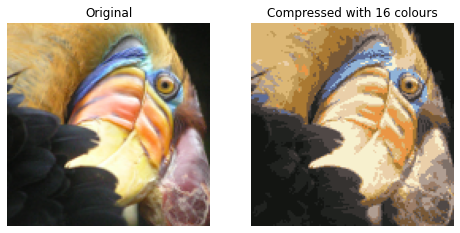

In [17]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()